# Week X - Generating Data Distributions 

<hr style="border:2px solid gray">

# Index: <a id='index'></a>

0. [Introduction to Monte Carlo](#intro)
1. [Inverse Transformation](#inverse)
1. [Numerical Inverse Transform](#numerical)
3. [The Accept-Reject Method](#accept-reject)
5. [Inbuilt Functions](#IF)
7. [Generating Correlated Variables - Cholesky Distribution](#cholesky)

<hr style="border:2px solid gray">

# Introduction to Monte Carlo Technique [^](#index) <a id='intro'></a>

Often you will need to simulate data distributions from experiments or theories to then compare with real data. This is called the **Monte Carlo Technique** and is a form of integration. This is often used for functions that are difficult to integrate or invert, however we will start with a more well behaved example. 

<hr style="border:2px solid gray">

# Inverse transform [^](#index) <a id='inverse'></a>

The mathematics given below shows that fundamental ideas behind generating the required random distribution, however the exact method is only applicable for integrable, invertable functions

Let us say we want to generate a random distribution, $x$, such that it has a given **probability distribution function** (pdf), $f(x)$ in the range $-\infty \le x \le \infty$. We can calculate the **cumulative distribution** up to a point $a$ using our pdf with the following integral:

\begin{equation}    
    F(a) =  \int_{-\infty}^a f(x) dx
\end{equation}  

$F(a)$ is thus itself a random variable distribution, and we will set it to have **uniform probability**. This the allows us to invert the above calculation and generate the distribution we desire.

This becomes much easier to understand through a concrete example:

Let us say we want to generate a distribution that has a pdf of $x^2$ for $ -2 \le x \lt 2$. We can then write the cumulative distribution, u, as:

$u=F(x') = \int_{-2}^{x'} x^2 dx = \left[ \dfrac{x^3}{3} \right]_{-2}^{x'}$

This will be a uniform function between $-\dfrac{8}{3}$ and $\dfrac{8}{3}$. If it is possible to invert this (as in this case), we can then apply the inversion to a random number with range $ -\frac{8}{3} \le x \lt \frac{8}{3}$ to get the desired pdf. i.e. if :

$u=F(x)$

then:

$x=F^{-1}(u)$

In this case:

$F^{-1}(u)= \sqrt[3]{3u}$ between $-\dfrac{8}{3} \le u \le \dfrac{8}{3}$

Let's see what this looks like as code:

In [1]:
import numpy as np
import pylab as pl
import numpy.random as npr 
import scipy.interpolate as spi

1.9999996576641585 -1.9999989060914451


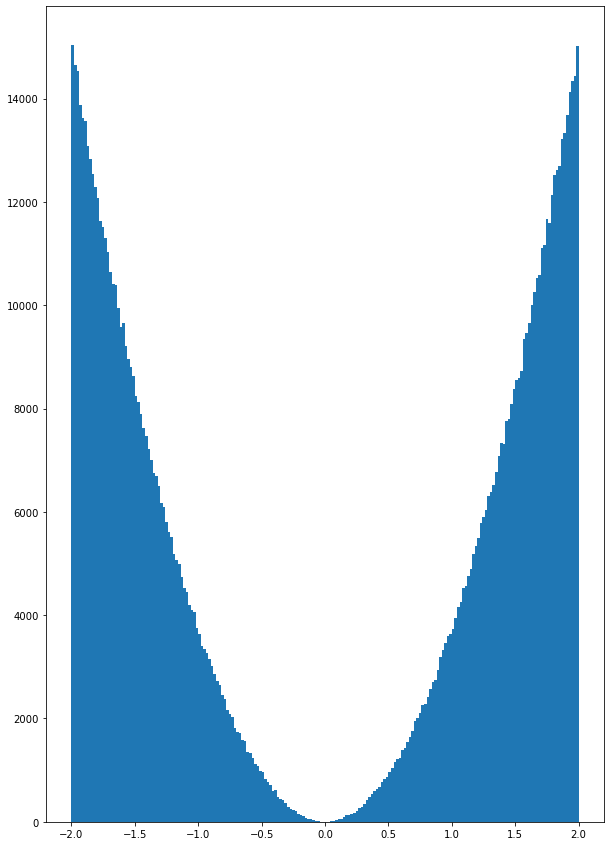

In [73]:
def inv(u):
    return np.cbrt(3*u)

x=[]

nr=1000000

for i in range(nr):
    u=npr.uniform(low=-8./3., high=8./3.) 
    x.append(inv(u))
    
    
x=np.array(x)
print(x.max(), x.min())
pl.hist(x,bins=200)

pl.show()
    

<div style="background-color: #FFF8C6">

### Optional Exercises


The code above could be much more efficient. How would you improve it? Try different approaches.

<hr style="border:2px solid gray">

# Numerical Inverse Transform [^](#index) <a id='numerical'></a>


The function that you have may be difficult to either integrate or invert. Howevever, provided you can calculate the function numerically, you can also **integrate it numerically** by summing the entries in the numpy array. This is done by setting the integral (i.e. sum) equal to 1, and then sampling between 0 and 1. We then need to interpolate between the steps in the integration, either linearly or with a cubic spline.

Once again, we will use a pdf of $x^2$ as our example:

1.0


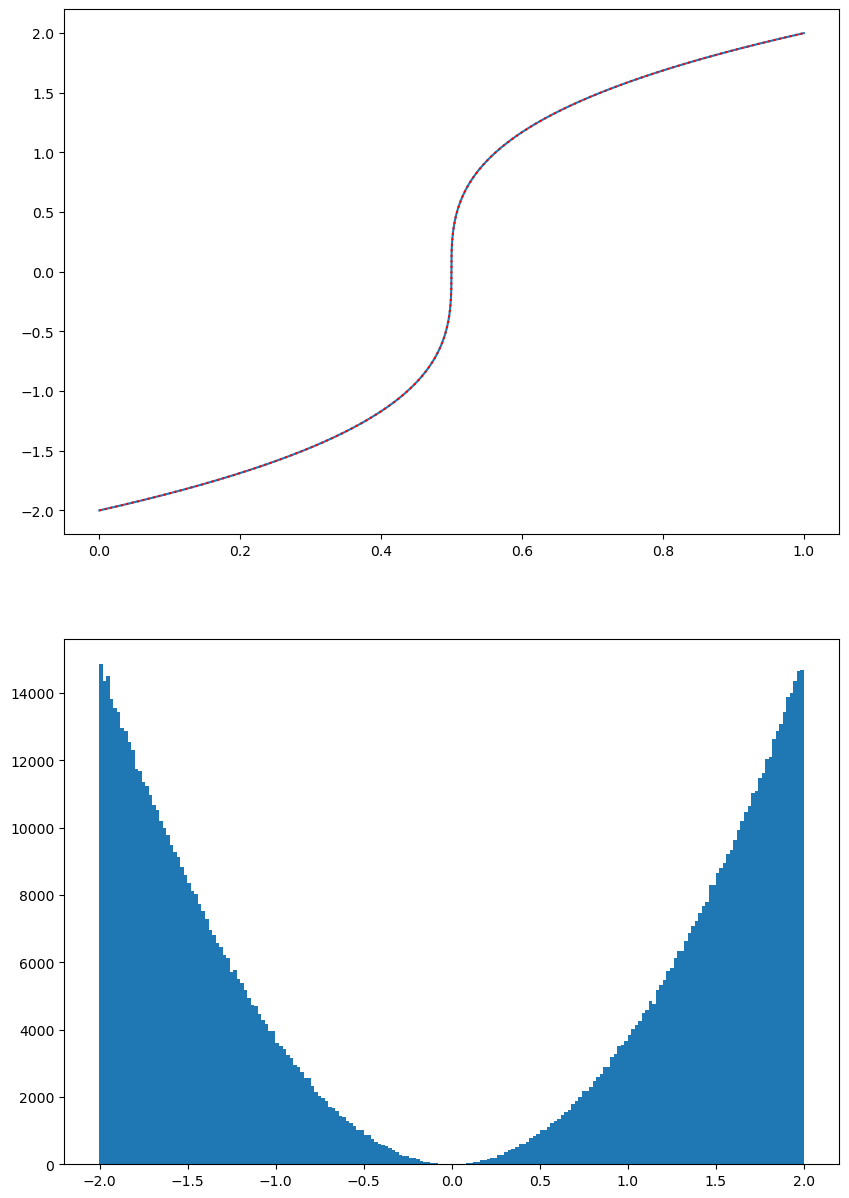

In [2]:
pl.rcParams['figure.figsize'] = [10, 15] 

x=np.arange(-2,2,0.0011) 
# step deliberately chosen so as to not exactly hit 0 
# splines don't like no change so avoid exactly zero

xsq=x*x
y=xsq.cumsum()

y=y/y[-1] #normalising the cumulative sum

print(y[-1])

# Now if we choose a value of x between 0 and 1, we can map it to a value between -2 and 2
# we will need to interpolate - one way of doing this is with a cubic spline


f = spi.CubicSpline(y,x) 
# This version allows f to be valid outside of the spline - which is useful here
# f is our approximation of the integral

# check if the spline is any  good
pl.subplot(2,1,1)
pl.plot(y,x)
pl.plot(y,f(y),"r:")

yr=npr.uniform(size=1000000)
xr=f(yr)

pl.subplot(2,1,2)
pl.hist(xr,bins=200)

pl.show()

<hr style="border:2px solid gray">

# The Accept-Reject Method [^](#index) <a id='accept-reject'></a>

If the pdf, $f(x)$, is too complicated even to invert numerically, then we can always use the accept/reject mechanism.

First, we generate a random number, $x$ in our desired range ($-2 \le x \le 2$) from a random uniform distribution, and then generate a second number,y, from the uniform distribution $h(y)$. The code below will display a graph of both these distributions.

If $y \le f(x)$, then we keep point x; otherwise it is rejected.

Many textbooks will tell you to normalise $f(x)$ and $h(y)$. However this is not needed if the numbers are scaled appropriately.

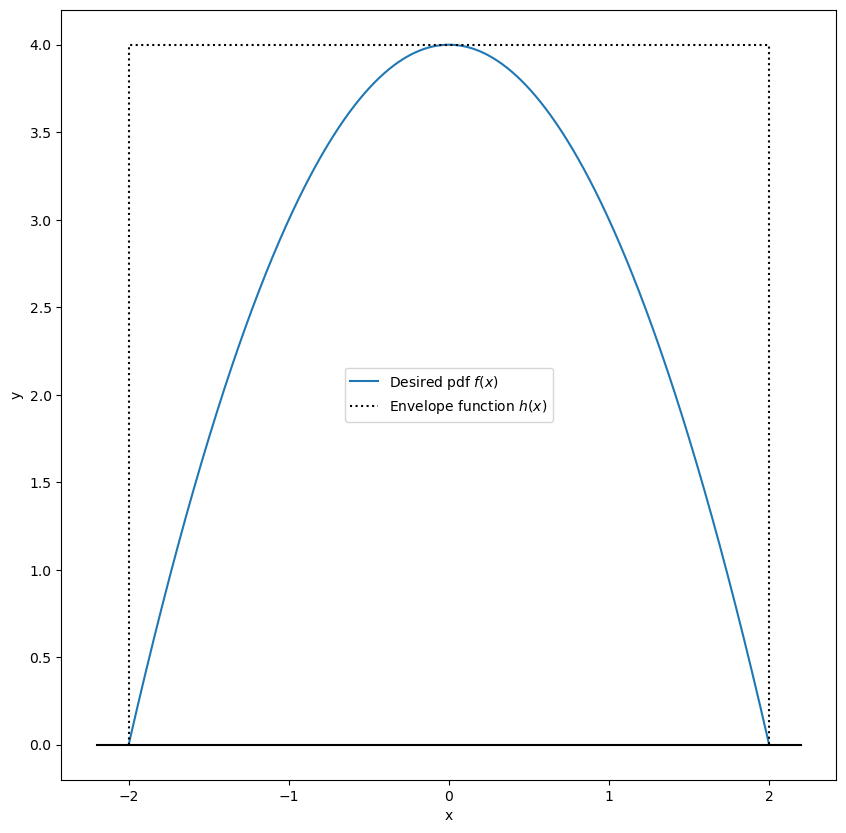

In [3]:
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

x=np.arange(-2,2,0.001)
y=f(x)

pl.plot(x,y,label="Desired pdf $f(x)$")
pl.plot([-2.2,2.2],[0,0], "k")
pl.plot([-2,-2,2,2],[0,4,4,0],"k:",label="Envelope function $h(x)$")
pl.xlabel("x")
pl.ylabel("y")
pl.legend()
pl.show()

This approach is very inefficient and should only be used when there really is no alternative - see the code below for a worked example.

Only a fraction of 0.666667  are kept


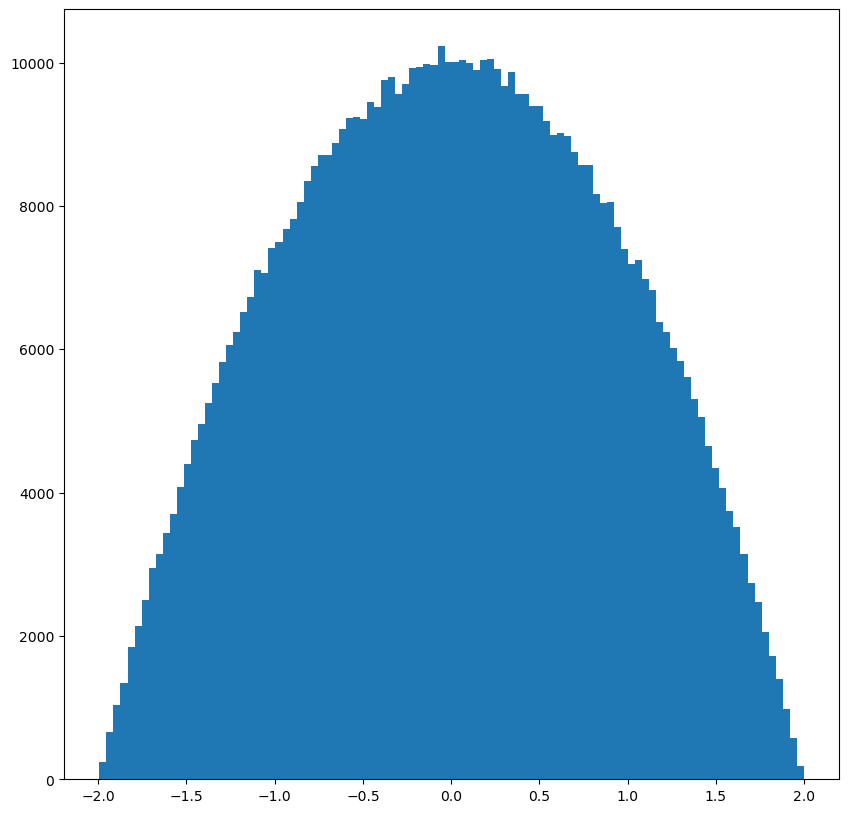

In [4]:
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

icount=0 # just to count the number accepted
ntries=1000000 #setting the number of tries

xpdf=[]

for i in range(ntries):
    x=npr.uniform(low=-2,high=2)
    y=npr.uniform(low=0,high=4)
    if f(x) >= y: # if this the case then keep the point
        xpdf.append(x)
        icount=icount+1

print("Only a fraction of",icount/ntries," are kept") 
        
pl.hist(xpdf,bins=100)
        
pl.show()      

<div style="background-color:#C2F5DD">

### Exercise 

Generate a distribution of 1 million entries with a pdf of $\sin(x)$ between 0 and $\pi$. Do this by:

1. Inverting the analytic integral
1. Integrating numerically
1. Using the accept-reject method

In [ ]:
#Write code here

<hr style="border:2px solid gray">

# Inbuilt functions [^](#index) <a id='IF'></a>

Fortunately, there are random number generators that will generate random numbers according to many of the different pdfs that you are likely to need. These exist in both [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html) and [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). These are very efficiently tuned generators and so you should use them when possible.

<div style="background-color:#C2F5DD">

### Exercise 

Pick three functions from each of numpy.random and scipy.stats and generate different distributions. Try generating them with different sizes and shapes and plotting them, working out the covariance matrix between them etc. It is best if you pick distributions where you know what the expected distributions look like. This exercise is a little open ended, but that is deliberate.

<hr style="border:2px solid gray">

# Generating Correlated Variables - Cholesky Decomposition [^](#index) <a id='cholesky'></a>

Some of the generators will be able to generate **correlated random numbers** (for example, see [numpy](numpy.random.multivariate_normal) documentation), however it is important that you understand how to do this yourself. 

There are several ways of doing this and one of the most popular is Cholesky decomposition. 

### Mathematics of Cholesky Decomposition

The covariance matrix, $\Sigma$, can be expressed as the product of two triangular matrices. If we take the lower triangular matrix $L$, we can write $\Sigma=LL^T$, where $L^T$ is the transpose of $L$. If we have a matrix containing uncorrelated variables and multiply it by $L$, the variables will then have the covariance described in $\Sigma$.

Mathematically: Let 
\begin{equation}
M = \begin{pmatrix}  \mathbf{x} \\ \mathbf{y} \end{pmatrix} 
\end{equation}
where $\mathbf{x}$ and $\mathbf{y}$ are vectors containing uncorrelated random variables. Then we can find M':

\begin{equation}
M' = \begin{pmatrix}  \mathbf{x'} \\ \mathbf{y'} \end{pmatrix} = LM
\end{equation}

where $\mathbf{x'}$ and $\mathbf{y'}$ are now correlated varaibles with a covariance matrix of $\Sigma$.

Consider the following simple example:

the lower triangular matrix
[[1.41421356 0.        ]
 [1.20208153 0.74498322]]
The product with the transpose
[[2.  1.7]
 [1.7 2. ]]
The measured covariance matrix is
[[2.00044195 1.69933894]
 [1.69933894 1.9967783 ]]


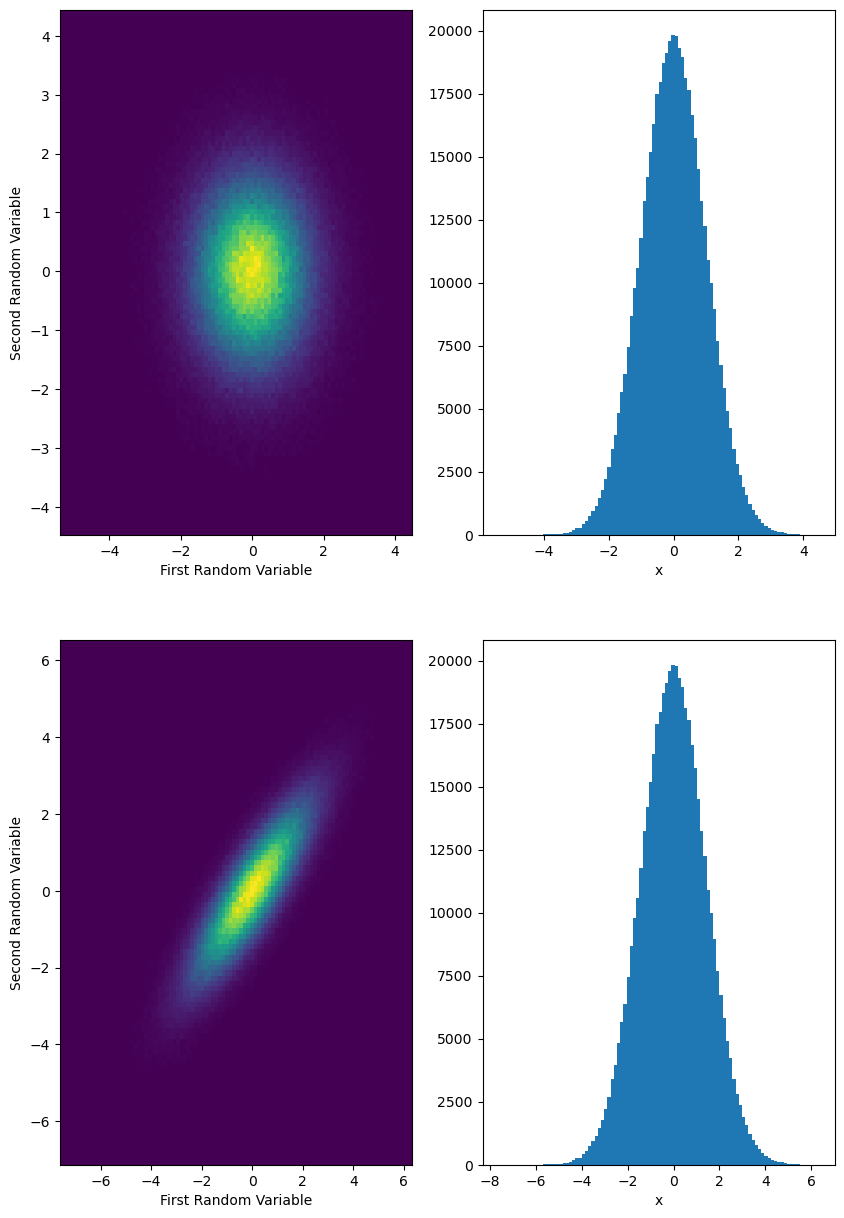

In [12]:
import scipy.linalg as spl

pl.rcParams['figure.figsize'] = [10, 15] 


# Define the covariance matrix  
# We will use Gaussians units so that this is the same as the correlation matrix
Sig=np.array([[2, 1.7],
             [1.7,2]])

L = spl.cholesky(Sig, lower=True)

print("the lower triangular matrix")
print(L)
print("The product with the transpose")
print(np.dot(L,L.T))

#xuncor=npr.exponential(5, size=(2, 500000))
xuncor=npr.normal(0, 1, size=(2, 500000))

x=xuncor[0]
y=xuncor[1]

pl.subplot(2,2,1)
pl.hist2d(x,y,bins=100)
pl.xlabel("First Random Variable" )
pl.ylabel("Second Random Variable")
          
# just plot a histogram of one variable
pl.subplot(2,2,2)
pl.hist(x,bins=100)
pl.xlabel("x")


xcorr=np.matmul(L,xuncor)
x=xcorr[0]
y=xcorr[1]

pl.subplot(2,2,3)
pl.hist2d(x,y,bins=100)
pl.xlabel("First Random Variable" )
pl.ylabel("Second Random Variable" )
pl.subplot(2,2,4)
pl.hist(x,bins=100)
pl.xlabel("x")

print("The measured covariance matrix is")
print(np.cov(xcorr))

pl.show()


<div style="background-color:#C2F5DD">

### Exercise

Since we are using Gaussians, the individual distributions have kept their shape.  Try using different distributions to investigate what happens when you apply a correlation.
